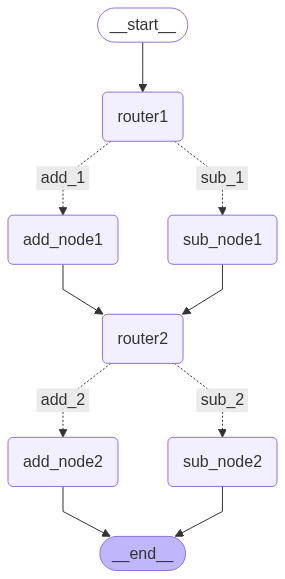

In [1]:
"""
Exercise 4: Two conditional edges
"""

from typing import Dict, TypedDict
from langgraph.graph import StateGraph, START, END # start and end point
from IPython.display import Image, display


class AgentState(TypedDict):
    number1: int
    number2: int
    operation1: str
    final1: int
    number3: int
    number4: int
    operation2: str
    final2: int


# nodes
def add_node1(state: AgentState) -> AgentState:
    state["final1"] = state["number1"] + state["number2"]
    return state

def sub_node1(state: AgentState) -> AgentState:
    state["final1"] = state["number1"] - state["number2"]
    return state

def add_node2(state: AgentState) -> AgentState:
    state["final2"] = state["number3"] + state["number4"]
    return state

def sub_node2(state: AgentState) -> AgentState:
    state["final2"] = state["number3"] - state["number4"]
    return state

# routers
def decide1(state: AgentState):
    if state["operation1"] == "+": return "add_1"
    elif state["operation1"] == "-": return "sub_1"

def decide2(state: AgentState):
    if state["operation2"] == "+": return "add_2"
    elif state["operation2"] == "-": return "sub_2"


# graph
graph = StateGraph(AgentState)
graph.add_node("add_node1", add_node1)
graph.add_node("sub_node1", sub_node1)
graph.add_node("router1", lambda state: state)
graph.add_node("add_node2", add_node2)
graph.add_node("sub_node2", sub_node2)
graph.add_node("router2", lambda state: state)

graph.add_edge(START, "router1")
graph.add_conditional_edges("router1", decide1, {"add_1": "add_node1", "sub_1": "sub_node1"})
graph.add_edge("add_node1", "router2")
graph.add_edge("sub_node1", "router2")
graph.add_conditional_edges("router2", decide2, {"add_2": "add_node2", "sub_2": "sub_node2"})
graph.add_edge("add_node2", END)
graph.add_edge("sub_node2", END)
app = graph.compile()
display(Image(app.get_graph().draw_mermaid_png()))

In [2]:
input = {
    "number1": 10,
    "number2": 5,
    "operation1": "-",
    "number3": 7,
    "number4": 2,
    "operation2": "+",
}
result = app.invoke(input)
print(result)

{'number1': 10, 'number2': 5, 'operation1': '-', 'final1': 5, 'number3': 7, 'number4': 2, 'operation2': '+', 'final2': 9}
